# Car Accident Severity

#### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Folium installed and imported!


#### Reading Data

In [7]:
df = pd.read_csv("Data-Collisions.csv")

Visualizing seattle map using Folium library

In [8]:
from IPython.display import display
LDN_COORDINATES = (47.60,-122.33)
seattle_map = folium.Map(LDN_COORDINATES, zoom_start=11)
# display map
display(seattle_map)

## Data Cleaning

In [9]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [10]:
def value_counts(col):
    print(col)
    print(df[col].value_counts())
    print('\n')
    return {col:df[col].value_counts().index[0]}

Taking only important features and applying value_counts method to each feature

In [11]:
data_cols = ['SEVERITYCODE','ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 
 'ROADCOND','LIGHTCOND', 'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']
list(map(value_counts,data_cols))

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


ADDRTYPE
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64


COLLISIONTYPE
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64


JUNCTIONTYPE
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64


WEATHER
Clear                       111135
Raining                      33145
Overcast                     2

[{'SEVERITYCODE': 1},
 {'ADDRTYPE': 'Block'},
 {'COLLISIONTYPE': 'Parked Car'},
 {'JUNCTIONTYPE': 'Mid-Block (not related to intersection)'},
 {'WEATHER': 'Clear'},
 {'ROADCOND': 'Dry'},
 {'LIGHTCOND': 'Daylight'},
 {'SPEEDING': 'Y'},
 {'UNDERINFL': 'N'},
 {'INATTENTIONIND': 'Y'}]

From the above observation we can see the count of every feature. Most frequent item of every feature is returned in a list. 

>Most frequently occured accident type is of `SEVERITYCODE` : "*1*".<br>
>Most frequently accidents occured at `ADDRTYPE` : "*BLOCK*".<br>
>Most frequent type of collisions are `COLLISIONTYPE` : "*Parked Car*".<br>
>Most frequent weather when accident occures `WEATHER`: "*Clear*".<br>
>Most frequent road conditions `ROADCOND` : "*Dry*".<br>
>Most frequent Light conditions `LIGHTCOND` : "*Daylight*".<br>
>Most frequent speeding condition `SPEEDING` : "*Yes*".<br>
>Is most of people are under drug influence `UNDERINFL` : "*No*".<br>
>Is most of the people are of inattention `INATTENTIONIND` : "*Yes*".<br>

In [12]:
df.shape

(194673, 38)

In [13]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')

#Creating additional Year, Month, Day, Weekday,Hour features
df['Year']=df['INCDTTM'].dt.year
df['Month']=df['INCDTTM'].dt.month
df['Day']=df['INCDTTM'].dt.day
df['Weekday']=df['INCDTTM'].dt.weekday
df['Hour'] = df['INCDTTM'].dt.hour

In [14]:
df1 = df.copy(deep = True) #Make a copy of data

## Map of Speed Vs Severity 

In [15]:
speed = df1[df1['SPEEDING']=="Y"]
speed = speed[speed['Year'].isin([2019,2020])]

speed_sev1 = speed[speed['SEVERITYCODE']==1]
speed_sev2 = speed[speed['SEVERITYCODE']==2]

#Obtain Location Values
speed_sev1 = speed_sev1[['X','Y']]
speed_sev2 = speed_sev2[['X','Y']]

speed.dropna(inplace = True)
speed_sev1.dropna(inplace = True)
speed_sev2.dropna(inplace = True)
print(speed_sev1.count())
print(speed_sev2.count())

X    247
Y    247
dtype: int64
X    162
Y    162
dtype: int64


In [16]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(speed_sev1.Y, speed_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(speed_sev2.Y, speed_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
seattle_map2 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map2.add_child(incidents1)
seattle_map2.add_child(incidents2)

- Red circle shows accident type of severity '2' due to speeding. <br>
- Blue dot shows places where accident type of severity '1' due to speeding<br>
<span style="color:red">Constructing speed breakers in the areas with max number of Blue or Red dots can decrease accidents due to speeding</span>


### Map - Alcohol Vs Severity 

In [17]:
alcohol = df1[df1['UNDERINFL'] == "Y"]
alcohol = alcohol[alcohol['Year'].isin([2019,2020])]


alc_sev1 = alcohol[alcohol['SEVERITYCODE'] == 1]
alc_sev2 = alcohol[alcohol['SEVERITYCODE'] == 2]
alc_sev1 = alc_sev1[['X',"Y"]]
alc_sev2 = alc_sev2[['X',"Y"]]

alc_sev1.dropna(inplace = True)
alc_sev2.dropna(inplace = True)
print(alc_sev1.count())
print(alc_sev2.count())

X    330
Y    330
dtype: int64
X    193
Y    193
dtype: int64


In [18]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(alc_sev1.Y, alc_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(alc_sev2.Y, alc_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
seattle_map2 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map2.add_child(incidents1)
seattle_map2.add_child(incidents2)

- Red color dots shows the places where accidents occured due to alcohol consumption and the severity is 2
- Blue color dots shows the places where accidents occured due to alcohol consumption and the severity is 1<br>

<span style="color:red">Police should have surveylens in the places with maximum number of colored dots</span>

### Light Condition vs Severity Code  - MAP

In [19]:
light = df1[df1['LIGHTCOND']=='Dark - No Street Lights']
light = light[light['Year'].isin([2019])]
light_sev1 = light[light['SEVERITYCODE']==1]
light_sev2 = light[light['SEVERITYCODE']==2]
light_sev1 = light_sev1[['X','Y']]
light_sev2 = light_sev2[['X','Y']]
light_sev1.dropna(inplace=True)
light_sev2.dropna(inplace=True)

print(light_sev1.count())
print(light_sev2.count())

X    56
Y    56
dtype: int64
X    16
Y    16
dtype: int64


In [20]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(light_sev1.Y, light_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(light_sev2.Y, light_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
seattle_map2 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map2.add_child(incidents1)
seattle_map2.add_child(incidents2)

- Red colored dots shows places where Street Lights are not there and accident of severity '2' happened
- Blue colored dots shows places where street Lights are absent and accident of severity '1' happened <br>
 <span style="color:red">Government has to establish street lights at the above marked places</span>

### Hit parked cars vs Severitycode -Map

In [21]:
parked = df1[df1['HITPARKEDCAR'] == "Y"]
parked = parked[parked['Year'].isin([2020])]


park_sev1 = parked[parked['SEVERITYCODE'] == 1]
park_sev2 = parked[parked['SEVERITYCODE'] == 2]
park_sev1 = park_sev1[['X',"Y"]]
park_sev2 = park_sev2[['X',"Y"]]

park_sev1.dropna(inplace = True)
park_sev2.dropna(inplace = True)
print(park_sev1.count())
print(park_sev2.count())

X    281
Y    281
dtype: int64
X    30
Y    30
dtype: int64


In [22]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(park_sev1.Y, park_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(park_sev2.Y, park_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
seattle_map2 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map2.add_child(incidents1)
seattle_map2.add_child(incidents2)

Data Types of features

In [23]:
df.dtypes

SEVERITYCODE               int64
X                        float64
Y                        float64
OBJECTID                   int64
INCKEY                     int64
COLDETKEY                  int64
REPORTNO                  object
STATUS                    object
ADDRTYPE                  object
INTKEY                   float64
LOCATION                  object
EXCEPTRSNCODE             object
EXCEPTRSNDESC             object
SEVERITYCODE.1             int64
SEVERITYDESC              object
COLLISIONTYPE             object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDATE                   object
INCDTTM           datetime64[ns]
JUNCTIONTYPE              object
SDOT_COLCODE               int64
SDOT_COLDESC              object
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTG

In [24]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,...,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,Year,Month,Day,Weekday,Hour
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,...,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,...,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03,2011.147766,6.549825,15.609032,2.938728,11.167106
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,...,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04,4.676992,3.430056,8.792279,1.921549,7.075297
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00,2004.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,...,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00,2007.000000,4.000000,8.000000,1.000000,6.000000
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,...,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00,2011.000000,7.000000,15.000000,3.000000,12.000000
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,...,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00,2015.000000,10.000000,23.000000,5.000000,17.000000
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,...,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06,2020.000000,12.000000,31.000000,6.000000,23.000000


In [25]:
df.describe(include='object')

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,JUNCTIONTYPE,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,188344,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,7,...,1,4,11,9,9,1,1,115,62,2
top,1780512,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,Mid-Block (not related to intersection),...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,89800,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


## Exploratory Data Analysis

Check the dataset for Imbalance

In [26]:
severity = df['SEVERITYCODE'].value_counts().to_frame()
severity

,SEVERITYCODE
1,136485
2,58188


In [27]:
df['SEVERITYCODE']

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 194673, dtype: int64

Text(0, 0.5, 'Value Count')

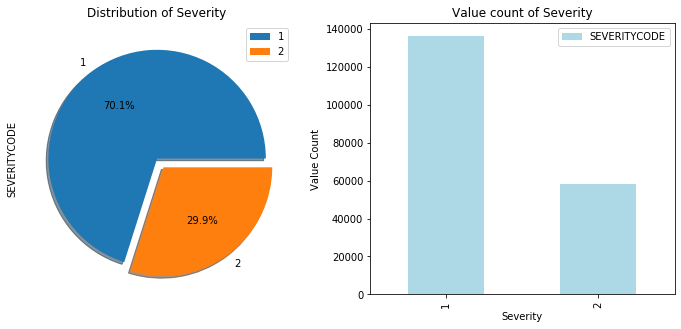

In [28]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

explode_list = [0,0.1]
severity.plot(kind='pie',
              figsize=(10,5),
              y='SEVERITYCODE',
             autopct= '%1.1f%%',
              explode=explode_list,
             shadow= True,
             ax=ax0)
ax0.set_title('Distribution of Severity')

severity.plot(kind='bar',
              ax=ax1,
              color='lightblue',
             figsize=(12,5))
ax1.set_title('Value count of Severity')
ax1.set_xlabel('Severity')
ax1.set_ylabel('Value Count')

We can see the dataset is imbalanced and this will introduce bias to the model. There are several ways to treat imbalance data. But I am using Undersampling technique and I will be doing it above model development part

##### Handling missing values for some feature

In [29]:
df1['ADDRTYPE'].fillna('Unknown',inplace=True)
df1['ROADCOND'].fillna('Other',inplace=True)
df1['COLLISIONTYPE'].fillna('Other',inplace=True)
df1['PEDROWNOTGRNT'].fillna(0,inplace=True)
df1['INATTENTIONIND'].fillna('No',inplace=True)
df1['HITPARKEDCAR'].fillna(0,inplace=True)
df1['WEATHER'].fillna('Other',inplace=True)
df1['LIGHTCOND'].fillna('Other', inplace=True)
df1['SPEEDING'].fillna('No', inplace=True)

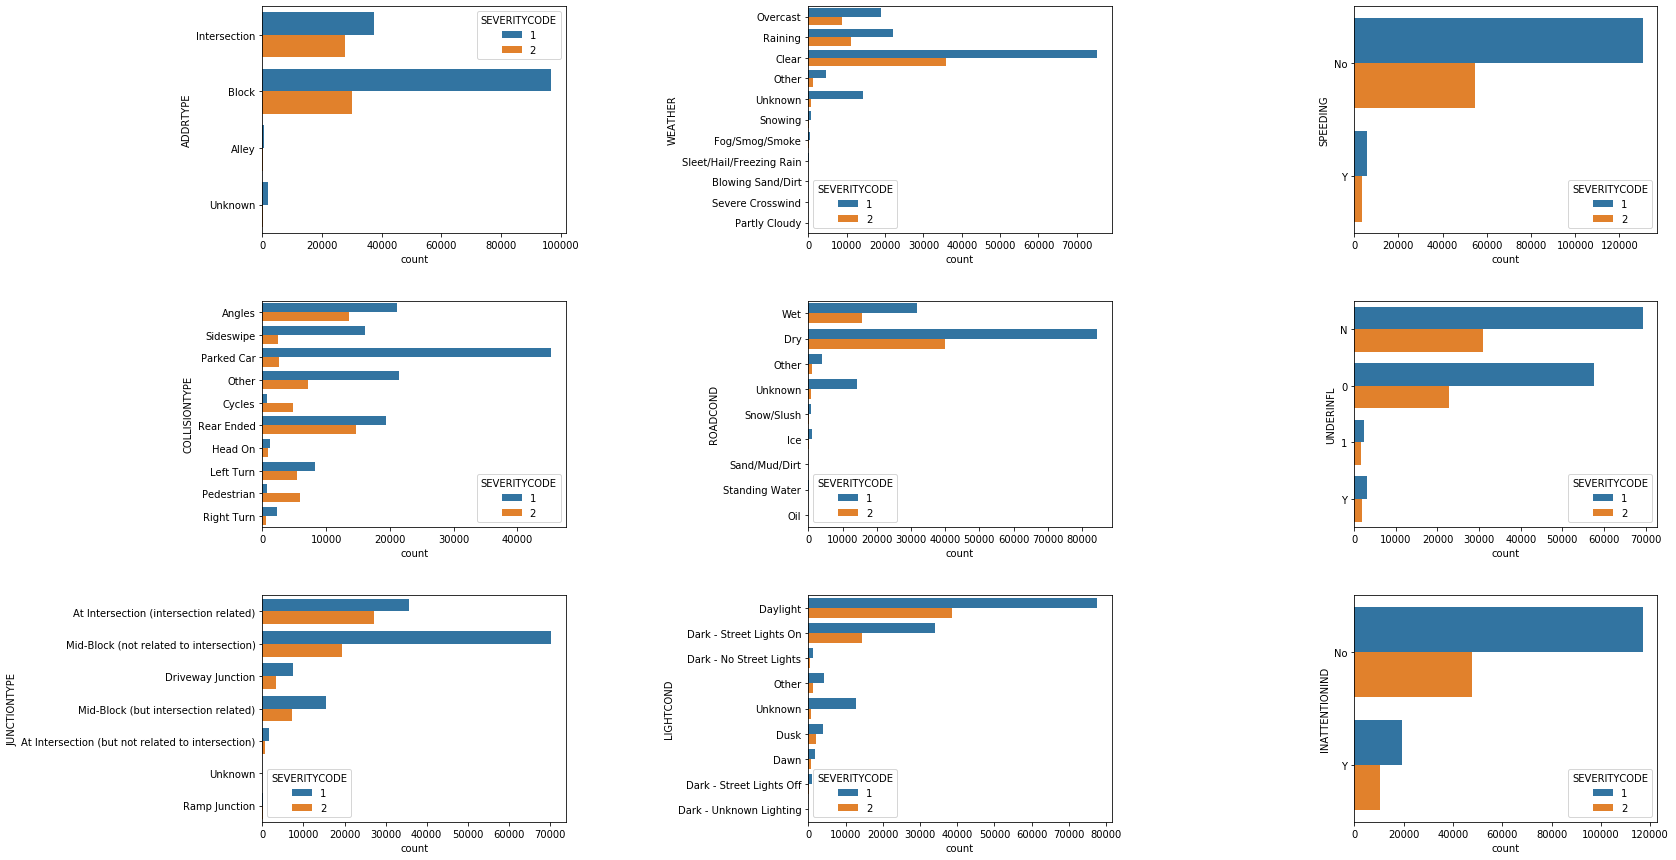

In [30]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(25,15))
plt.subplots_adjust(hspace =0.3, wspace=0.8)
sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=df1, ax=axs[0, 0])
sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=df1, ax=axs[1, 0])
sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=df1, ax=axs[2, 0])
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df1, ax=axs[0, 1])
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df1, ax=axs[1, 1])
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df1, ax=axs[2, 1])
sns.countplot(y="SPEEDING", hue="SEVERITYCODE", data=df1, ax=axs[0, 2])
sns.countplot(y="UNDERINFL", hue="SEVERITYCODE", data=df1, ax=axs[1, 2])
sns.countplot(y="INATTENTIONIND", hue="SEVERITYCODE", data=df1, ax=axs[2, 2])

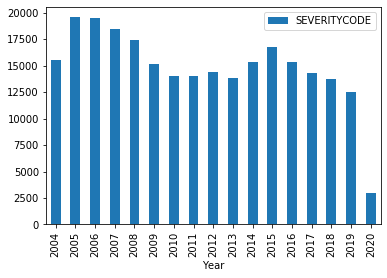

In [31]:
df1[['Year','SEVERITYCODE']].groupby('Year').sum().plot(kind='bar')

let's visualize year wise accidents as per severity code 

In [32]:
a = df[df['SEVERITYCODE'] == 1]
c= a[['Year','SEVERITYCODE']].groupby('Year').sum()
b = df[df['SEVERITYCODE'] == 2]
d=b[['Year','SEVERITYCODE']].groupby('Year').sum()

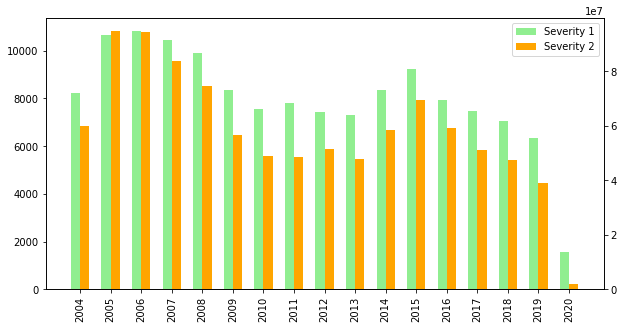

In [33]:
plt.figure(figsize=(10,5))
x = np.arange(17)
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, c.index, rotation='vertical')
code1 =ax1.bar(x, c['SEVERITYCODE'], width=w, color='lightgreen', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()

code2 =ax2.bar(x + w, d['SEVERITYCODE'] * c.SEVERITYCODE, width=w,color='orange',align='center')
#Set the Y axis label as GDP.

#To set the legend on the plot we have used plt.legend()
plt.legend([code1, code2],['Severity 1', 'Severity 2'])
plt.xlabel("Year")
#To show the plot finally we have used plt.show().
plt.show()

Accident count is very high in the years 2006,2007. Later accident count has been decreasing from 2014 

In [34]:
df1['UNDERINFL'].fillna(0,inplace=True)
df1['UNDERINFL'].replace(to_replace=['N','0'],value=[0,0],inplace=True)
df1['UNDERINFL'].replace(to_replace=['Y','1'],value=[1,1],inplace=True)

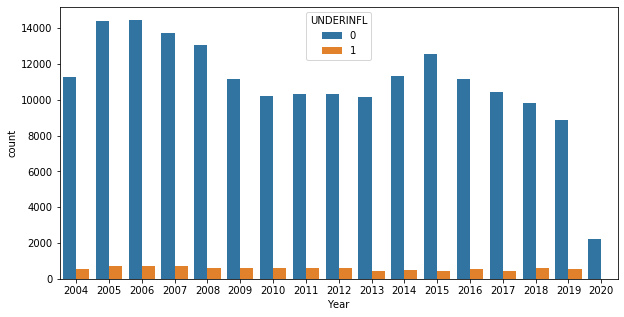

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='Year',hue='UNDERINFL',data=df1)

From the above figure we can say that most of the accident are not because of under influence of drugs.

# Feature Selection

Selecting the relevant features using the information given in metadata.<br>
Metadata Link :[https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf]

In [36]:
selected_columns = ['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT',
                    'INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND',
                    'PEDROWNOTGRNT','SPEEDING','COLLISIONTYPE','HITPARKEDCAR','Year','Month','Day','Weekday','Hour','SEVERITYCODE']


In [37]:
df1 = df1[selected_columns]
df1.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Weekday,Hour,SEVERITYCODE
0,Intersection,2,0,0,2,No,0,Overcast,Wet,Daylight,0,No,Angles,N,2013,3,27,2,14,2
1,Block,2,0,0,2,No,0,Raining,Wet,Dark - Street Lights On,0,No,Sideswipe,N,2006,12,20,2,18,1
2,Block,4,0,0,3,No,0,Overcast,Dry,Daylight,0,No,Parked Car,N,2004,11,18,3,10,1
3,Block,3,0,0,3,No,0,Clear,Dry,Daylight,0,No,Other,N,2013,3,29,4,9,1
4,Intersection,2,0,0,2,No,0,Raining,Wet,Daylight,0,No,Angles,N,2004,1,28,2,8,2


In [38]:
df1.dtypes

ADDRTYPE          object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INATTENTIONIND    object
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
COLLISIONTYPE     object
HITPARKEDCAR      object
Year               int64
Month              int64
Day                int64
Weekday            int64
Hour               int64
SEVERITYCODE       int64
dtype: object

#### Feature encoding

Changing categorical variables to integer values and handling missing values

In [39]:

df1['ADDRTYPE'].replace(to_replace=['Intersection', 'Block', 'Alley','Unknown'],value=[1,2,3,0],inplace=True)


df1['INATTENTIONIND'].replace(to_replace=['No','Y'],value=[0,1],inplace=True)

df1['PEDROWNOTGRNT'].replace(to_replace=['Y'],value=[1],inplace=True)


df1['COLLISIONTYPE'].replace(to_replace=['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian',
       'Right Turn'],value=[1,2,3,0,4,5,6,7,8,9],inplace=True)

df1['HITPARKEDCAR'].replace(to_replace=['N','Y'],value=[0,1],inplace=True)

#df1['UNDERINFL'].fillna(0,inplace=True)
#df1['UNDERINFL'].replace(to_replace=['Y','1'],value=[1,1],inplace=True)
#df1['UNDERINFL'].replace(to_replace=['N','0'],value=[0,0],inplace=True)



df1['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke',
                                  'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind','Partly Cloudy'],
                      value=[1,2,3,0,4,0,5,6,7,8,9],inplace=True)

df1['ROADCOND'].replace(to_replace=['Wet', 'Dry','Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'],value=[1,2,0,3,4,0,5,6,7],inplace=True)


df1['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'],
                         value=[0,1,2,3,4,5,6,7,8],inplace=True)

df1['SPEEDING'].value_counts()
df1['SPEEDING'].replace(to_replace=['No','Y'], value=[0,1],inplace=True)


In [40]:
df1.dropna(inplace=True)

In [41]:
df1.shape

(194673, 20)

In [42]:
corr = df1.corr()

In [43]:
corr

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Weekday,Hour,SEVERITYCODE
ADDRTYPE,1.000000,-0.053761,-0.128081,-0.074398,0.069622,0.078559,0.045148,-0.036956,-0.021867,0.040165,-0.141013,0.058618,-0.049176,0.105247,-0.046241,0.004724,-0.000169,0.012551,-0.034285,-0.172032
PERSONCOUNT,-0.053761,1.000000,-0.023464,-0.038809,0.380523,0.077435,0.022420,0.053764,0.074310,-0.084861,-0.027449,-0.002963,0.113564,-0.052766,-0.064019,-0.000646,0.001211,0.058063,0.044555,0.130949
PEDCOUNT,-0.128081,-0.023464,1.000000,-0.016920,-0.261285,-0.004315,0.016592,0.029939,0.019784,-0.020716,0.494641,-0.032838,0.374387,-0.035264,0.024348,0.005682,0.004522,-0.019643,0.031569,0.246338
PEDCYLCOUNT,-0.074398,-0.038809,-0.016920,1.000000,-0.253773,0.004073,-0.016401,0.001117,0.051477,-0.038356,0.323652,-0.020391,0.067223,-0.030187,0.034281,0.006844,-0.001309,-0.024964,0.028026,0.214218
VEHCOUNT,0.069622,0.380523,-0.261285,-0.253773,1.000000,0.076277,0.006609,0.108458,0.170261,-0.349764,-0.227990,-0.025743,0.153815,0.048845,-0.102730,0.011713,0.008066,0.011002,0.132056,-0.054686
INATTENTIONIND,0.078559,0.077435,-0.004315,0.004073,0.076277,1.000000,-0.025953,0.040360,0.084036,-0.092918,-0.026442,-0.048805,0.092439,0.011946,0.103836,0.007571,0.005364,-0.016094,0.041368,0.046378
UNDERINFL,0.045148,0.022420,0.016592,-0.016401,0.006609,-0.025953,1.000000,0.036773,0.044478,0.033892,-0.017585,0.092356,-0.039376,0.010153,-0.006173,0.001595,0.002502,0.074900,-0.021827,0.044377
WEATHER,-0.036956,0.053764,0.029939,0.001117,0.108458,0.040360,0.036773,1.000000,0.144440,-0.211029,0.021380,0.095871,0.042066,-0.068252,-0.045128,0.005712,0.003516,0.006029,0.032421,0.076438
ROADCOND,-0.021867,0.074310,0.019784,0.051477,0.170261,0.084036,0.044478,0.144440,1.000000,-0.399344,0.018861,0.016458,0.075771,-0.069625,-0.065466,-0.011521,0.013048,-0.005635,0.091092,0.100801
LIGHTCOND,0.040165,-0.084861,-0.020716,-0.038356,-0.349764,-0.092918,0.033892,-0.211029,-0.399344,1.000000,-0.023753,-0.005588,-0.166945,0.062174,0.121308,0.000853,-0.016772,0.027733,-0.153318,-0.078245


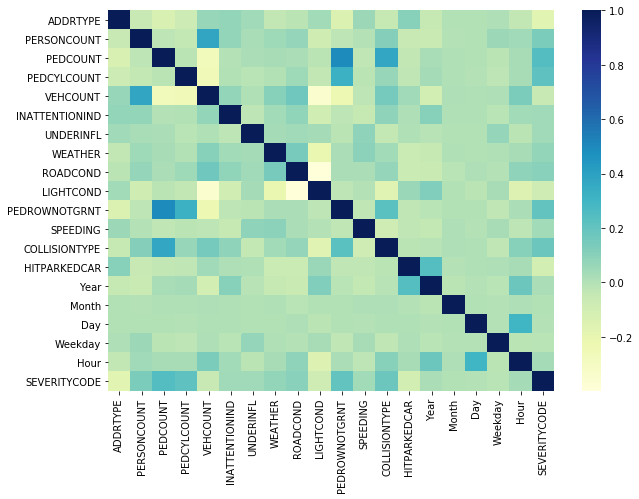

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,linecolor='red',cmap='YlGnBu')

## Model Development

In [45]:
y = df1['SEVERITYCODE']
X = df1.drop(['SEVERITYCODE'],axis=1)

In [46]:
y.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Using undersampling method we are removing bias.

NO of property damage incidents: 136485
NO of Injury incidents 58188


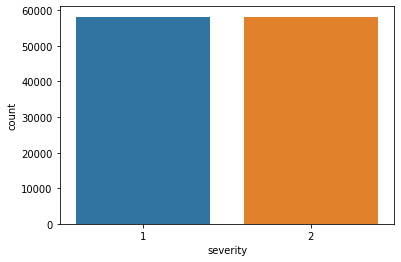

In [47]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
colData = X_resampled
colData['severity'] = y_resampled

prop_damage = df1[df1.SEVERITYCODE == 1]
injury = df1[df1.SEVERITYCODE == 2]

print("NO of property damage incidents:" , len(prop_damage))
print("NO of Injury incidents", len(injury))

sns.countplot(x="severity", data=colData)

In [48]:
colData['severity'].value_counts()

2    58188
1    58188
Name: severity, dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

from cf_matrix import make_confusion_matrix


Seperating training and target variables

In [50]:
y_new = colData['severity']
X_new = colData.drop(['severity'],axis=1)

Splitting into training and testing Data

In [51]:
#X = StandardScaler().fit(X_resampled).transform(X_resampled.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=4)

## Model Building

### Logistic Regression

In [52]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_hat =  LR.predict(X_test)
cf_matrix_lr = confusion_matrix(y_test,y_hat)

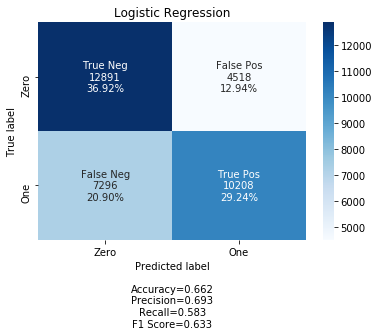

In [53]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_lr, group_names=labels, categories=categories, cmap='Blues', title='Logistic Regression')

### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)
cf_matrix_tree = confusion_matrix(y_test,predTree)

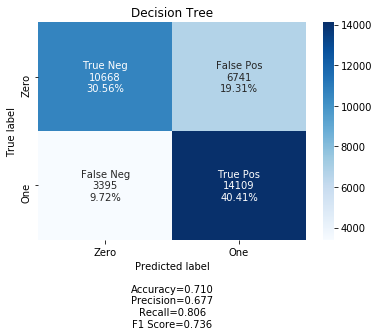

In [55]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_tree, group_names=labels, categories=categories, cmap='Blues', title='Decision Tree')


### K Means

In [56]:
from sklearn.neighbors import KNeighborsClassifier

0.6049322601896142
0.5868874058373672
0.6253258098702489
0.6097442213502133
0.6324578237332799
0.6195399994271474
0.6365250766190245
0.6245238163434824
0.6376994242832182
0.6288774954887865
0.6415088935353593
0.6330879615043107
0.6421103886804342
0.6358949388479935
0.6455761464211038
0.6369547160083636
0.6475238449861084
0.640048119611606
0.6476097728639761
0.638444132558073
0.6472947039784608
0.6403918311230774
0.6478102712456678
0.642253601810214
0.6484976942686106
0.6417666771689629
0.6489559762839057
0.6442013003752184
0.6479821270014035


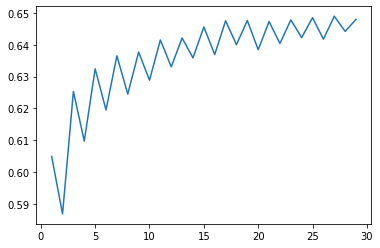

In [100]:
from sklearn.metrics import accuracy_score
# Best k
Ks=30
accuracy = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    accuracy[n-1] = accuracy_score(y_test, yhat)
    print(accuracy[n-1])43


plt.plot(range(1,Ks), accuracy)


From the above graph we can see that for k=27, we are getting better results

In [57]:
kNN_model = KNeighborsClassifier(n_neighbors=27).fit(X_train,y_train)
yhat_k = kNN_model.predict(X_test)
cf_matrix_kmeans = confusion_matrix(y_test,yhat_k)

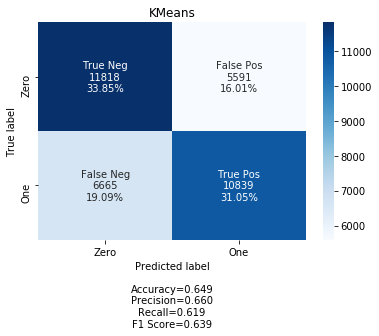

In [58]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_kmeans, group_names=labels, categories=categories, cmap='Blues', title='KMeans')

### Support Vector Machine

In [60]:
from sklearn import svm

SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)
yhat_svm = SVM_model.predict(X_test)
cf_matrix_svm=confusion_matrix(y_test,yhat_svm)

C:\Users\Sai Sudheer\Documents\Machine learning\6.capsotne\Capstone-Project-IBM\cf_matrix.py:81: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = cf[1,1] / sum(cf[:,1])


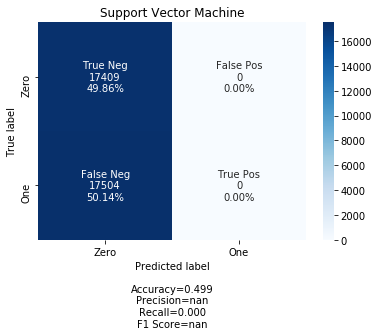

In [61]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_svm, group_names=labels, categories=categories, cmap='Blues', title='Support Vector Machine')

### Random Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=83,max_features=6).fit(X_train,y_train)
yhat_rf = RF_model.predict(X_test)


In [192]:
cf_matrix_rf = confusion_matrix(y_test,yhat_rf)

In [193]:
cf_matrix_rf

array([[11527,  5882],
       [ 4755, 12749]], dtype=int64)

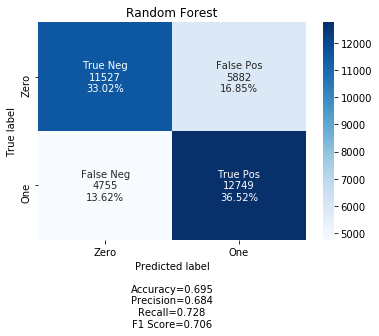

In [194]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_rf, group_names=labels, categories=categories, cmap='Blues', title='Random Forest')

### XGBoost

In [83]:
from xgboost import XGBClassifier
from xgboost import plot_importance
clf = XGBClassifier(random_state=4).fit(X_train,y_train)
print(clf.feature_importances_)

[0.03024631 0.06741575 0.12562782 0.08157557 0.1374476  0.01806516
 0.0405043  0.01583184 0.02380117 0.01758195 0.01140257 0.02579525
 0.33629885 0.01243102 0.01217886 0.01070663 0.01108603 0.01085371
 0.01114965]


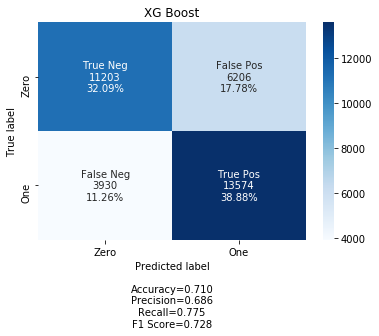

In [114]:
yhat_xg = clf.predict(X_test)
cf_matrix_xg = confusion_matrix(y_test,yhat_xg)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_xg, group_names=labels, categories=categories, cmap='Blues', title='XG Boost')


## Optimization

In [141]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)

C:\Users\Sai Sudheer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [145]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 1}, 0.7961509805021825)

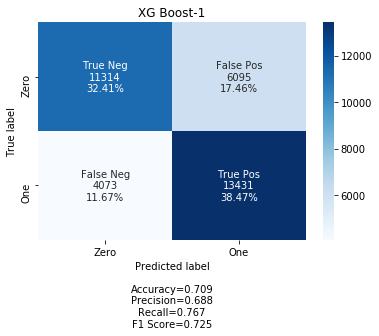

In [129]:
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27).fit(X_train,y_train)
yhat_xg1 = xgb1.predict(X_test)
cf_matrix_xg1 = confusion_matrix(y_test,yhat_xg1)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_xg1, group_names=labels, categories=categories, cmap='Blues', title='XG Boost-1')


<BarContainer object of 19 artists>

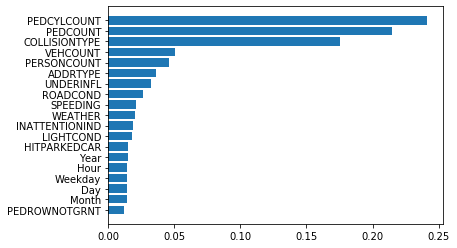

In [140]:
a = xgb1.feature_importances_.argsort()
plt.barh(X_train.columns[a], xgb1.feature_importances_[a])


### Decision-Tree optimized

In [95]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
#Creating a pca object


# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

# Creating a pipeline of three steps. First, standardizing the data.
# Second, tranforming the data with PCA.
# Third, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),('dec_tree', dec_tree)])

# Creating Parameter Space
# Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X_train.shape[1]+1,1))

    # Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

    # Creating a dictionary of all the parameter options 
    # Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(dec_tree__criterion=criterion,dec_tree__max_depth=max_depth)

    # Conducting Parameter Optmization With Pipeline
    # Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

    # Fitting the grid search
clf_GS.fit(X_train, y_train)

    # Viewing The Best Parameters
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best Criterion: gini
Best max_depth: 10
Best Number Of Components: 19

DecisionTreeClassifier(max_depth=10)


In [99]:
clf_GS.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=19)),
                ('dec_tree', DecisionTreeClassifier(max_depth=10))])

In [110]:
from sklearn.tree import DecisionTreeClassifier
Tree1 = DecisionTreeClassifier(criterion="gini", max_depth = 10)
Tree1.fit(X_train,y_train)
predTree = Tree1.predict(X_test)

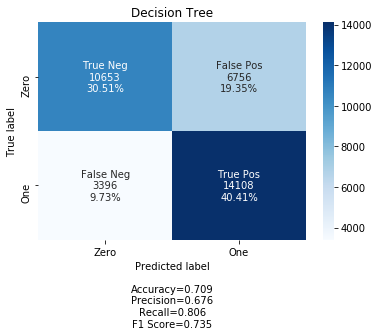

In [111]:
cf_matrix_tree = confusion_matrix(y_test,predTree)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_tree, group_names=labels, categories=categories, cmap='Blues', title='Decision Tree')
